In [1]:
## インポート
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import jpy_datareader.data as web
from dotenv import load_dotenv

# e-StatのAPI_KEY
'''
「pythonで環境ファイルを読み込む」を参照
https://zenn.dev/nakashi94/articles/9c93b6a58acdb4
'''
load_dotenv()
api = os.environ.get("API_KEY")

In [3]:
df = web.DataReader("0003224464", "estat", api_key=api)
df.to_csv('./data/trans.csv')
df

,年齢階級,性別,時間軸(年次),人数,平均値,標準偏差
0,(再掲)20歳-64歳,女性,2012年,8618.0,6893.0,3704.0
1,(再掲)20歳-64歳,女性,2013年,2022.0,7006.0,3799.0
2,(再掲)20歳-64歳,女性,2014年,2110.0,6794.0,3762.0
3,(再掲)20歳-64歳,女性,2015年,2001.0,6991.0,3733.0
4,(再掲)20歳-64歳,女性,2016年,6554.0,6770.0,3414.0
...,...,...,...,...,...,...
292,総数,総数,2015年,5858.0,6670.0,4219.0
293,総数,総数,2016年,20236.0,6463.0,3757.0
294,総数,総数,2017年,5380.0,6322.0,4057.0
295,総数,総数,2018年,5356.0,6340.0,4021.0


In [4]:
year_df=  df.sort_values('時間軸(年次)')
year_list = year_df['時間軸(年次)'].unique().tolist()
year_list

['2009年',
 '2012年',
 '2013年',
 '2014年',
 '2015年',
 '2016年',
 '2017年',
 '2018年',
 '2019年']

In [3]:
age_list = df['年齢階級'].unique().tolist()
age_list

['(再掲)20歳-64歳',
 '(再掲)20歳以上',
 '(再掲)65歳-74歳',
 '(再掲)65歳以上',
 '(再掲)75歳以上',
 '15歳-19歳',
 '20歳-29歳',
 '30歳-39歳',
 '40歳-49歳',
 '50歳-59歳',
 '60歳-69歳',
 '70歳以上',
 '総数']

In [5]:
df = pd.read_csv('./data/trans.csv',index_col=0)

## データを絞る
'''
時間軸(年次) : 2009-2019
性別： 総数
年齢階級 : '20歳-29歳','30歳-39歳','40歳-49歳','50歳-59歳','60歳-69歳'
'''
age_list =  ['20歳-29歳','30歳-39歳','40歳-49歳','50歳-59歳','60歳-69歳']
df = df[(df['年齢階級'].isin(age_list)) & (df['性別'] == '総数') & (df['時間軸(年次)'].isin(year_list))]
df.to_csv('./data/trans2.csv')
df

,年齢階級,性別,時間軸(年次),人数,平均値,標準偏差
126,20歳-29歳,総数,2009年,624.0,8586.0,6390.0
127,20歳-29歳,総数,2012年,2003.0,7459.0,4612.0
128,20歳-29歳,総数,2013年,531.0,7704.0,4607.0
129,20歳-29歳,総数,2014年,457.0,7452.0,4802.0
130,20歳-29歳,総数,2015年,465.0,8017.0,4645.0
131,20歳-29歳,総数,2016年,1386.0,7959.0,4693.0
132,20歳-29歳,総数,2017年,374.0,7330.0,4300.0
133,20歳-29歳,総数,2018年,410.0,7332.0,4322.0
134,20歳-29歳,総数,2019年,327.0,7433.0,4926.0
153,30歳-39歳,総数,2009年,1016.0,7632.0,4291.0


In [6]:
# 年次別に値と値2の合計を算出
yearly_sum = df.groupby('時間軸(年次)').agg({
    '人数': 'sum',
    '平均値': 'mean'
}).reset_index()
yearly_sum

,時間軸(年次),平均値
0,2009年,7630.0
1,2012年,7280.2
2,2013年,7368.2
3,2014年,7226.4
4,2015年,7406.2
5,2016年,7212.2
6,2017年,7050.8
7,2018年,7048.8
8,2019年,7124.0


In [53]:
# 年次別に値と値2の合計を算出
df = pd.read_csv('./data/trans2.csv',index_col=0)
yearly_mean = df.groupby('時間軸(年次)').agg({'平均値': 'mean'})
yearly_mean.rename(columns={'平均値': '歩行数(平均)'},inplace=True)
yearly_mean['前年の差']= yearly_mean['歩行数(平均)'].diff()
print(f"前年の差の平均:{yearly_mean['前年の差'].mean()}")
yearly_mean

前年の差の平均:-63.25


,歩行数(平均),前年の差
時間軸(年次),,
2009年,7630.0,NaN
2012年,7280.2,-349.8
2013年,7368.2,88.0
2014年,7226.4,-141.8
2015年,7406.2,179.8
2016年,7212.2,-194.0
2017年,7050.8,-161.4
2018年,7048.8,-2.0
2019年,7124.0,75.2


In [51]:
yearly_mean['前年の差'].mean()

-63.25

In [29]:
# 値のフォーマット
format_dict = {'歩行数(平均)':'{0:,.0f}'}
# グラフの設定をしながら表示
(yearly_mean
 .style
 .format(format_dict)
 .bar(color="#99ceff", vmin=7124,vmax=8000, subset=['歩行数(平均)'], align='zero'))

,歩行数(平均)
時間軸(年次),
2009年,"7,630"
2012年,"7,280"
2013年,"7,368"
2014年,"7,226"
2015年,"7,406"
2016年,"7,212"
2017年,"7,051"
2018年,"7,049"
2019年,"7,124"


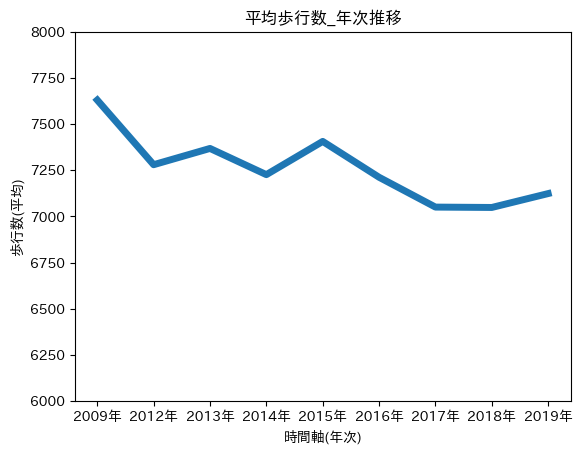

In [35]:
plt.plot(yearly_mean.index, yearly_mean['歩行数(平均)'], linewidth=5)
plt.xlabel('時間軸(年次)')
plt.ylabel('歩行数(平均)')
plt.title('平均歩行数_年次推移')
plt.ylim(6000, 8000)  # y軸の範囲を0から10000に設定
plt.show()

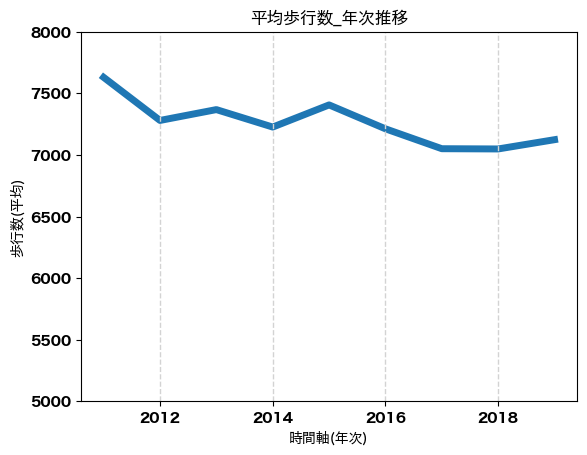

In [46]:
# フォントスタイルの設定
font = {'family': 'Hiragino Sans',  # フォントの種類
        'weight': 'bold',   # フォントの太さ
        'size': 10}         # フォントサイズ

plt.rc('font', **font)  # 全体のフォント設定に適用

# グラフの作成
fig, ax = plt.subplots()
# 折れ線グラフのプロット
ax.plot(yearly_mean.index, yearly_mean['歩行数(平均)'], linewidth=5)

# x軸の目盛りを設定
# 表示したいx軸の位置を指定
ax.set_xticks(['2012年', '2014年','2016年', '2018年'])
# 表示したいラベルを設定
ax.set_xticklabels(['2012', '2014','2016', '2018'])

# y軸に対しての線を追加
ax.axvline(x='2012年', color='lightgrey', linestyle='--', linewidth=1)
ax.axvline(x='2014年', color='lightgrey', linestyle='--', linewidth=1)
ax.axvline(x='2016年', color='lightgrey', linestyle='--', linewidth=1)
ax.axvline(x='2018年', color='lightgrey', linestyle='--', linewidth=1)

# 軸ラベルの設定
ax.set_xlabel('時間軸(年次)')
ax.set_ylabel('歩行数(平均)')

# グラフの表示
plt.title('平均歩行数_年次推移')
plt.ylim(5000, 8000)
plt.savefig('./img/trans.png')
plt.show()